# Tugas Besar 1 Pemrograman Data Analitik 2 


Nama : Sukmawati Rizki Firdaus
Nim  : 41820010127

# Dataset yang digunakan adalah dataset Earthquake.csv dengan keterangan seperti di bawah:
The data contains intensity of earthquake per year, include date and year and also intensity of earthquake as follow.

* **date** - Date Identifier
* **Year** - Year Identifier
* **earthquakes_per_years** - intensity of earthquake



In [40]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Read in the data
data = pd.read_csv('earthquakes.csv')

# Plot the data
fig = px.line(data, x='date', y='earthquakes_per_year',
              labels=({'earthquakes_per_year': 'Earthquakes per year', 'date': 'Date'}))

fig.update_layout(template="simple_white", font=dict(size=18),
                  title_text='Earthquakes per year', width=650,
                  title_x=0.5, height=400)

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

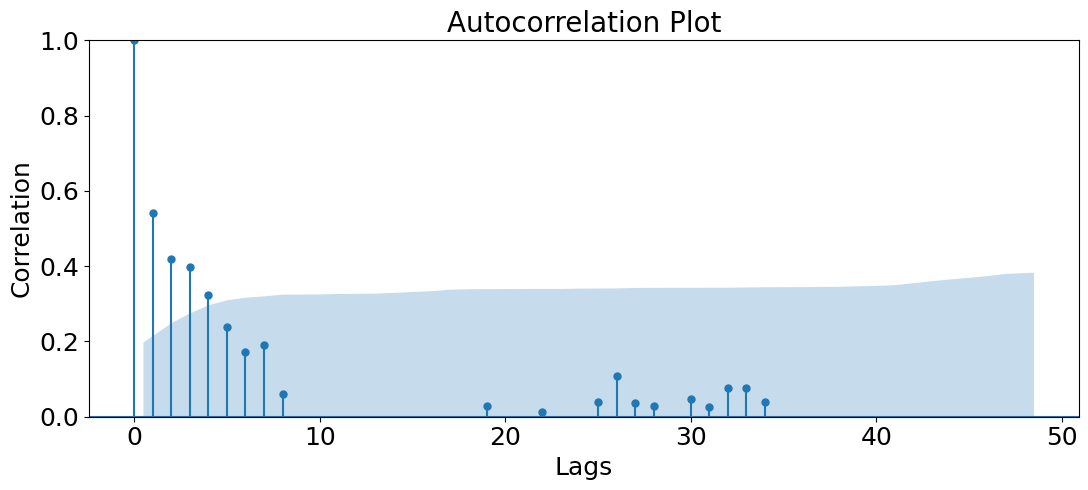

In [42]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Plot autocorrelation
plt.rc("figure", figsize=(11,5))
plot_acf(data['earthquakes_per_year'], lags=48)
plt.ylim(0,1)
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.rc("figure", figsize=(11,5))
plot_pacf(data['earthquakes_per_year'], method='ywm')
plt.xlabel('Lags', fontsize=18)
plt.ylabel('Correlation', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Partial Autocorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

In [46]:
data["date"]=pd.to_datetime(data["date"])
data

KeyError: ignored

In [45]:
data.dtypes

Year                      int64
earthquakes_per_year    float64
dtype: object

In [44]:
data.set_index("date",inplace=True)
data

,Year,earthquakes_per_year
date,,
1900-01-01,1900,13.0
1901-01-01,1901,14.0
1902-01-01,1902,8.0
1903-01-01,1903,10.0
1904-01-01,1904,16.0
...,...,...
1994-01-01,1994,15.0
1995-01-01,1995,25.0
1996-01-01,1996,22.0


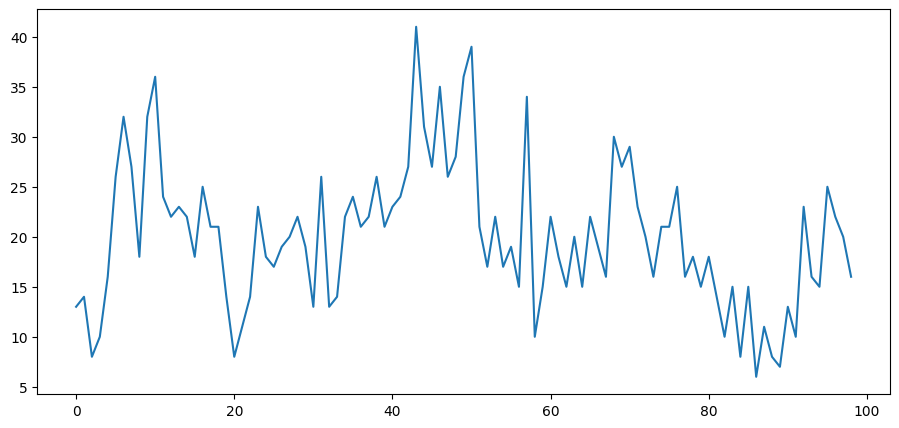

In [43]:
plt.plot(data["earthquakes_per_year"])

In [47]:
from statsmodels.tsa.stattools import adfuller
adf,pvalue,usedlag_,nobs_,critical_values_,icbest_= adfuller(data)

ValueError: ignored

In [48]:
print(pvalue)

NameError: ignored

In [ ]:
print(adf)

In [ ]:
print(critical_values_)

In [ ]:
data["Year"]=[d.year for d in data.index]
data

In [ ]:
data["month"]=[d.strftime('%b') for d in data.index]
data

In [ ]:
sns.boxplot(x='Year',y='earthquakes_per_year',data=data)

In [ ]:
sns.boxplot(x='Year',y='earthquakes_per_year',data=data)

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposed=seasonal_decompose(data["earthquakes_per_year"],
                             model='additive'
                             )

ValueError: ignored

In [50]:
trend=decomposed.trend
sesonal=decomposed.seasonal
residual=decomposed.resid

NameError: ignored

In [51]:
trend

NameError: ignored

In [ ]:
sesonal

In [ ]:
residual

NameError: ignored

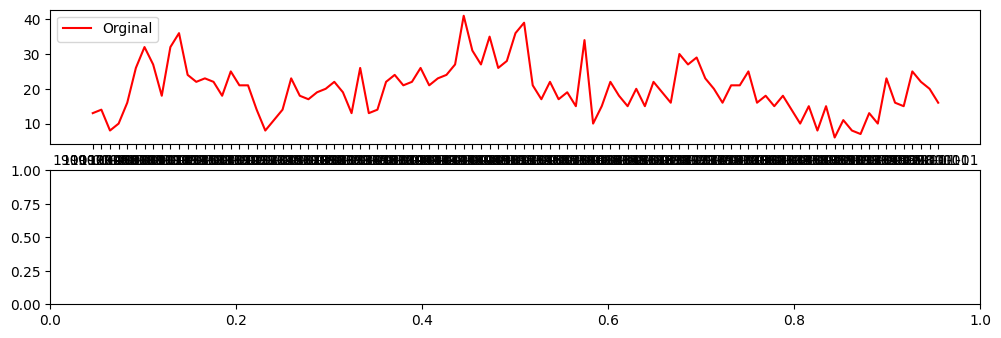

In [52]:
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(data["earthquakes_per_year"],label="Orginal",color='red')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend,label="Trend",color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(sesonal,label="Sesonal",color='red')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual,label="Residual",color='red')
plt.legend(loc='upper left')
plt.show()

In [53]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
from pmdarima.arima import auto_arima

In [55]:
arima_model=auto_arima(data["earthquakes_per_year"],start_p=1,d=1,start_q=1,
                      max_p=5,max_q=5,max_d=5,m=12,
                        start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                      seasonal=True,
                       trace=True,
                      error_action="ignore",
                      suppress_warnings=True,
                      stepwise=True,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=618.348, Time=0.09 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=636.429, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=612.516, Time=0.14 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=594.161, Time=0.19 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=616.916, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=595.838, Time=0.36 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=595.806, Time=0.90 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=605.052, Time=0.13 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.78 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=612.491, Time=0.32 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=595.929, Time=0.40 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=595.844, Time=0.27 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=602.092, Time=0.21 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=1.16 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AI

In [57]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   99
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -294.081
Date:                            Mon, 17 Apr 2023   AIC                            594.161
Time:                                    01:18:44   BIC                            601.524
Sample:                                01-01-1900   HQIC                           597.125
                                     - 01-01-1998                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5469      0.094     -5.812      0.000      -0.731      -0.363
ma.S.L12      -0.7445      0.155     -4.790      0.000      -1.049      -0.440
sigma2        48.6898      7.847      6.205      0.000      33.310      64.070
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.85   Prob(JB):                         0.68
Heteroskedasticity (H):               0.76   Skew:                             0.17
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
size=int(len(data)*0.66)
X_train,X_test=data[0:size],data[size:len(data)]

In [59]:
X_train.shape

(65, 2)

In [60]:
X_test.shape

(34, 2)

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [62]:
model=SARIMAX(X_train["earthquakes_per_year"],
             order=(1,1,1),
             seasonal_order=(0,1,0,12))
result=model.fit()
result.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                earthquakes_per_year   No. Observations:                   65
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 12)   Log Likelihood                -187.057
Date:                             Mon, 17 Apr 2023   AIC                            380.114
Time:                                     01:18:52   BIC                            385.968
Sample:                                 01-01-1900   HQIC                           382.358
                                      - 01-01-1964                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1153      0.222      0.520      0.603      -0.319       0.550
ma.L1         -0.5513      0.197     -2.798      0.005      -0.938      -0.165
sigma2        77.6286     17.110      4.537      0.000      44.093     111.164
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.57
Prob(Q):                              1.00   Prob(JB):                         0.75
Heteroskedasticity (H):               2.18   Skew:                             0.17
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

1900-01-01     0.000000
1901-01-01    12.999791
1902-01-01    13.999944
1903-01-01     8.000186
1904-01-01     9.999957
                ...    
1960-01-01    15.797525
1961-01-01    27.156825
1962-01-01    24.664890
1963-01-01     1.636860
1964-01-01     8.527625
Freq: AS-JAN, Name: predicted_mean, Length: 65, dtype: float64

In [64]:
st_index=len(X_train)
ed_index=len(data)-1
predction=result.predict(st_index,ed_index)
predction

1965-01-01    16.316166
1966-01-01    10.891390
1967-01-01    12.842410
1968-01-01     8.836762
1969-01-01    27.836111
1970-01-01     3.836036
1971-01-01     8.836027
1972-01-01    15.836026
1973-01-01    11.836026
1974-01-01     8.836026
1975-01-01    13.836026
1976-01-01     8.836026
1977-01-01    10.152192
1978-01-01     4.727416
1979-01-01     6.678436
1980-01-01     2.672788
1981-01-01    21.672137
1982-01-01    -2.327938
1983-01-01     2.672053
1984-01-01     9.672052
1985-01-01     5.672052
1986-01-01     2.672052
1987-01-01     7.672052
1988-01-01     2.672052
1989-01-01     3.988218
1990-01-01    -1.436558
1991-01-01     0.514462
1992-01-01    -3.491186
1993-01-01    15.508163
1994-01-01    -8.491913
1995-01-01    -3.491921
1996-01-01     3.508078
1997-01-01    -0.491922
1998-01-01    -3.491922
Freq: AS-JAN, Name: predicted_mean, dtype: float64

ConversionError: ignored

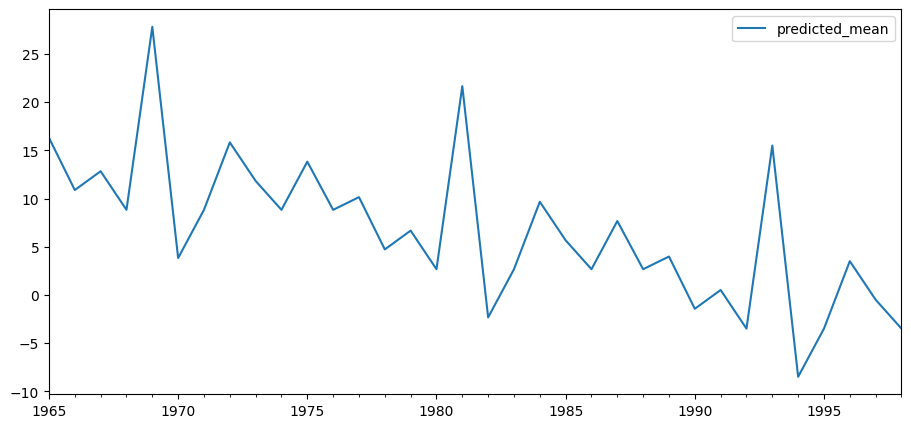

In [66]:
predction.plot(legend=True)
X_test["earthquakes_per_year"].plot(legend=True)

In [67]:
import math
from sklearn.metrics import mean_squared_error

In [68]:
trainScore=math.sqrt(mean_squared_error(X_train['earthquakes_per_year'],train_predction))
testScore=math.sqrt(mean_squared_error(X_test["earthquakes_per_year"],predction))
trainScore,testScore

(8.730685052506448, 13.739519136379503)

In [69]:
forcast=result.predict(start=len(data),
                      end=(len(data)-1)+3*12,
                      typ="levels").rename('Forecast')

TypeError: ignored

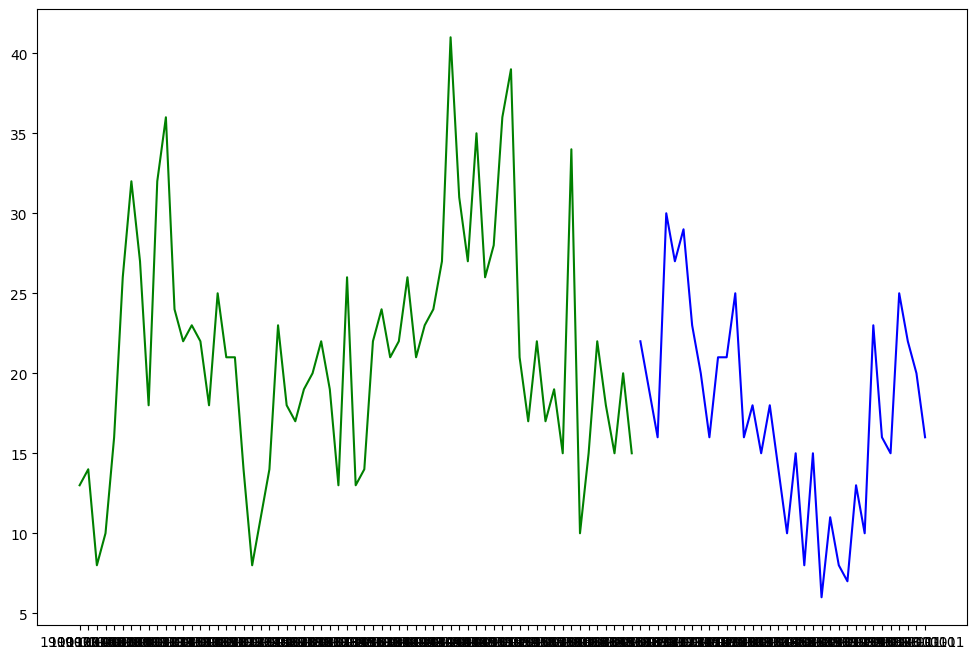

In [72]:
plt.figure(figsize=(12,8))
plt.plot(X_train["earthquakes_per_year"],label="Training",color='green')
plt.plot(X_test["earthquakes_per_year"],label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")

In [73]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
from pmdarima.arima import auto_arima

In [75]:
arima_model=auto_arima(data["earthquakes_per_year"],start_p=1,d=1,start_q=1,
                      max_p=5,max_q=5,max_d=5,m=12,
                        start_P=0,D=1,start_Q=0,max_P=5,max_D=5,max_Q=5,
                      seasonal=True,
                       trace=True,
                      error_action="ignore",
                      suppress_warnings=True,
                      stepwise=True,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=618.348, Time=0.20 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=636.429, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=612.516, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=594.161, Time=0.41 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=616.916, Time=0.05 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=595.838, Time=0.37 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=595.806, Time=0.85 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=605.052, Time=0.12 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=1.97 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=612.491, Time=0.17 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=595.929, Time=0.29 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=595.844, Time=0.27 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=602.092, Time=0.19 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=inf, Time=1.23 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AI

In [76]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   99
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -294.081
Date:                            Mon, 17 Apr 2023   AIC                            594.161
Time:                                    01:20:08   BIC                            601.524
Sample:                                01-01-1900   HQIC                           597.125
                                     - 01-01-1998                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5469      0.094     -5.812      0.000      -0.731      -0.363
ma.S.L12      -0.7445      0.155     -4.790      0.000      -1.049      -0.440
sigma2        48.6898      7.847      6.205      0.000      33.310      64.070
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.85   Prob(JB):                         0.68
Heteroskedasticity (H):               0.76   Skew:                             0.17
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
size=int(len(data)*0.66)
X_train,X_test=data[0:size],data[size:len(data)]

In [78]:
X_train.shape

(65, 2)

In [79]:
X_test.shape

(34, 2)

In [80]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [81]:
model=SARIMAX(X_train["earthquakes_per_year"],
             order=(0,1,1),
             seasonal_order=(2,1,0,12))
result=model.fit()
result.summary()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency AS-JAN will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                earthquakes_per_year   No. Observations:                   65
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -181.784
Date:                             Mon, 17 Apr 2023   AIC                            371.569
Time:                                     01:20:09   BIC                            379.374
Sample:                                 01-01-1900   HQIC                           374.561
                                      - 01-01-1964                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5550      0.115     -4.838      0.000      -0.780      -0.330
ar.S.L12      -0.4071      0.212     -1.924      0.054      -0.822       0.008
ar.S.L24      -0.5166      0.205     -2.525      0.012      -0.918      -0.116
sigma2        53.8552     12.994      4.145      0.000      28.388      79.322
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 0.78
Prob(Q):                              0.67   Prob(JB):                         0.68
Heteroskedasticity (H):               1.87   Skew:                             0.25
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
start_index=0
end_index=len(X_train)-1
train_predction=result.predict(start_index,end_index)
train_predction

1900-01-01     0.000000
1901-01-01    12.999714
1902-01-01    13.999956
1903-01-01     8.000264
1904-01-01     9.999912
                ...    
1960-01-01    16.275754
1961-01-01    22.939744
1962-01-01    23.115822
1963-01-01     9.896692
1964-01-01    12.834986
Freq: AS-JAN, Name: predicted_mean, Length: 65, dtype: float64

In [84]:
st_index=len(X_train)
ed_index=len(data)-1
predction=result.predict(st_index,ed_index)
predction

1965-01-01    15.103583
1966-01-01     8.711692
1967-01-01    15.080735
1968-01-01     7.088287
1969-01-01    19.306984
1970-01-01     8.335234
1971-01-01    13.317429
1972-01-01    15.699013
1973-01-01    12.968754
1974-01-01    12.928101
1975-01-01    15.279202
1976-01-01    13.785637
1977-01-01    13.816510
1978-01-01    12.123707
1979-01-01    22.912574
1980-01-01    13.446280
1981-01-01    16.545209
1982-01-01    16.798843
1983-01-01    14.556582
1984-01-01    16.235723
1985-01-01    19.187115
1986-01-01    21.040917
1987-01-01    12.589813
1988-01-01    10.185214
1989-01-01    12.774935
1990-01-01     9.887961
1991-01-01    16.620542
1992-01-01     9.816600
1993-01-01    20.131370
1994-01-01     9.085035
1995-01-01     9.793284
1996-01-01    14.144057
1997-01-01    14.126377
1998-01-01    13.680233
Freq: AS-JAN, Name: predicted_mean, dtype: float64

ConversionError: ignored

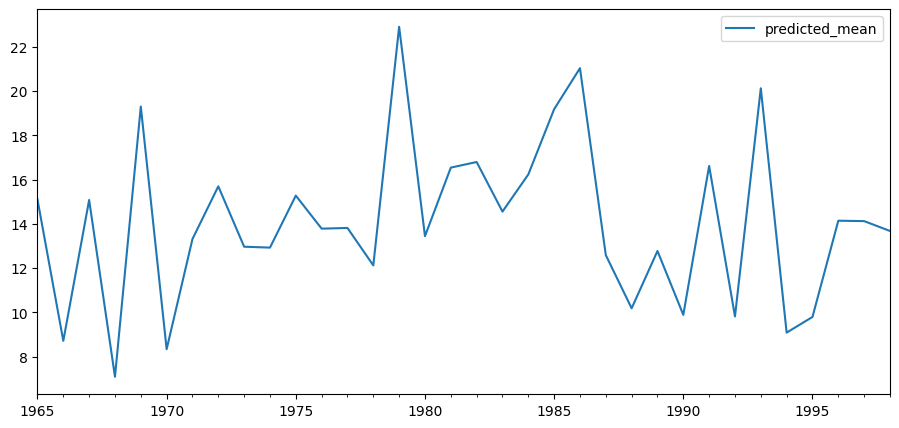

In [85]:
predction.plot(legend=True)
X_test["earthquakes_per_year"].plot(legend=True)

In [86]:
import math
from sklearn.metrics import mean_squared_error

In [87]:
trainScore=math.sqrt(mean_squared_error(X_train['earthquakes_per_year'],train_predction))
testScore=math.sqrt(mean_squared_error(X_test["earthquakes_per_year"],predction))
trainScore,testScore

(8.008576106063027, 8.829260153122172)

In [88]:
forcast=result.predict(start=len(data),
                      end=(len(data)-1)+3*12,
                      typ="levels").rename('Forecast')

TypeError: ignored

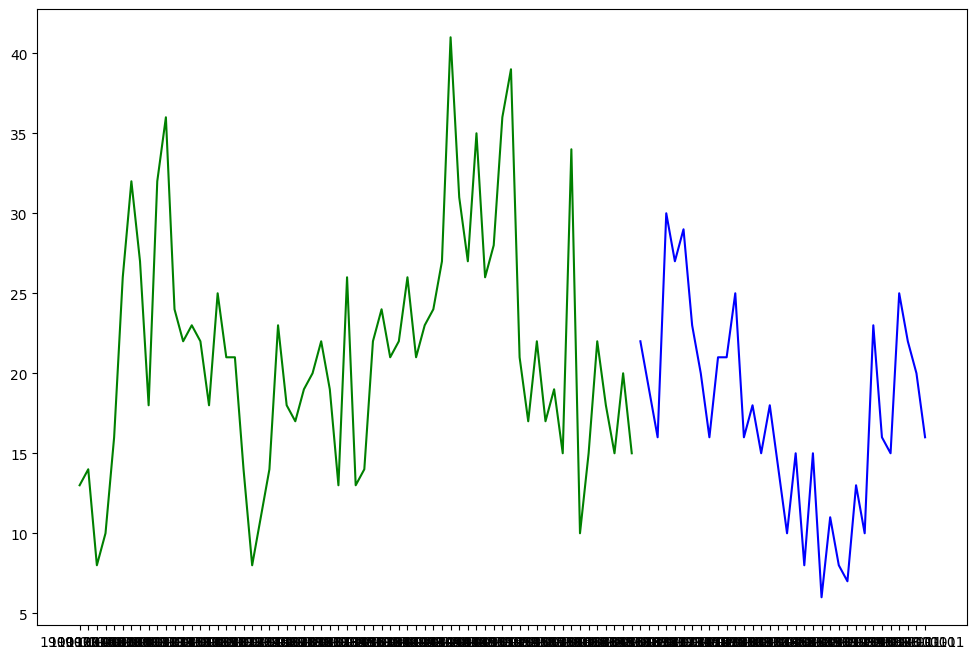

In [89]:
plt.figure(figsize=(12,8))
plt.plot(X_train["earthquakes_per_year"],label="Training",color='green')
plt.plot(X_test["earthquakes_per_year"],label="Test",color='blue')
plt.plot(forcast,label="Forecast",color="red")
plt.legend(loc="upper left")
     